In [1]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [2]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2017', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2017,326,"Bill,de Blasio",2017-08-14,Corporation,Brooklyn,NY,11201,0.0,0,0.0,0.0,518,Office Expenses,Office Expenses
1,2017,326,"Bill,de Blasio",2017-09-21,Corporation,Brooklyn,NY,11201,0.0,0,0.0,0.0,1041,Office Expenses,Office Expenses
2,2017,326,"Bill,de Blasio",2017-12-29,Corporation,Brooklyn,NY,11201,0.0,0,0.0,0.0,1500,Office Rent,Office Rent
3,2017,2055,"Roque,De La Fuente",2017-07-14,Corporation,New York,NY,10025,0.0,0,0.0,0.0,6000,Professional Services,Prof. Srvcs.
4,2017,2055,"Roque,De La Fuente",2017-06-09,Corporation,New York,NY,10025,0.0,0,0.0,0.0,6000,Professional Services,Prof. Srvcs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,2017,2071,"Nicole,Malliotakis",2017-11-04,Individual,Astoria,NY,11102,0.0,0,0.0,0.0,54,Advance Repayment,Advance Repaymnt
3790,2017,2071,"Nicole,Malliotakis",2017-11-08,Individual,Astoria,NY,11102,0.0,0,0.0,0.0,125,Fundraising,Fundraising
3791,2017,326,"Bill,de Blasio",2016-09-08,Individual,New York,NY,10021,0.0,0,0.0,0.0,239,Other,Other: explntion
3792,2017,326,"Bill,de Blasio",2016-12-27,Individual,New York,NY,10021,0.0,0,0.0,0.0,239,Other,Other: explntion


In [3]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
total_groupby

,zipcode,amount,matchamt,totalamount,expenditure_amount
candidatename,,,,,
"de Blasio, Bill",222354702,5743050.45,558914,7.265360e+06,0
"Malliotakis, Nicole",77972802,1060107.69,421005,1.704985e+06,0
"Bashner, Richard S",3152174,57608.00,10780,7.416300e+04,0
"De La Fuente, Roque R",1845041,25411.00,6075,3.151600e+04,0
"Gangi, Robert A",1790127,12890.00,6740,2.138000e+04,0
"Laurel-Smith, Abbey S",20032,14850.00,175,1.502500e+04,0
"Slattery, Collin",186991,1446.00,668,3.614000e+03,0
"Browder, Akeem",863925,2151.00,1204,3.537000e+03,0
"Commey, Aaron A",115605,1400.00,190,3.170000e+03,0


In [4]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [5]:
Contributions_df.head()

amount  matchamt  \
zipcode date       contributiontype city     state                        
0       2016-11-15  Marcia          Q        Rosedale     0.0       100   
        2016-12-16 Individual       Weston   CT         175.0         0   
        2017-01-07 Individual       NYC      NY          10.0         0   
        2017-01-11 Individual       BRONX    NY          10.0        10   
                                    New York NY          10.0        10   

                                                       totalamount  \
zipcode date       contributiontype city     state                   
0       2016-11-15  Marcia          Q        Rosedale          0.0   
        2016-12-16 Individual       Weston   CT              175.0   
        2017-01-07 Individual       NYC      NY               10.0   
        2017-01-11 Individual       BRONX    NY               20.0   
                                    New York NY               20.0   

                                                       expenditure_amount  
zipcode date       contributiontype city     state                         
0       2016-11-15  Marcia          Q        Rosedale                   0  
        2016-12-16 Individual       Weston   CT                         0  
        2017-01-07 Individual       NYC      NY                         0  
        2017-01-11 Individual       BRONX    NY                         0  
                                    New York NY                         0

In [6]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,2016-11-15,Marcia,Q,Rosedale,0.0,100,0.0,0
1,0,2016-12-16,Individual,Weston,CT,175.0,0,175.0,0
2,0,2017-01-07,Individual,NYC,NY,10.0,0,10.0,0
3,0,2017-01-11,Individual,BRONX,NY,10.0,10,20.0,0
4,0,2017-01-11,Individual,New York,NY,10.0,10,20.0,0
...,...,...,...,...,...,...,...,...,...
18687,98516,2016-07-11,Individual,Olympia,WA,10.0,0,10.0,0
18688,98682,2017-10-27,Individual,VANCOUVER,WA,25.0,0,25.0,0
18689,99336,2017-06-19,Individual,Kennewick,WA,15.0,0,15.0,0
18690,99652,2017-10-27,Individual,BIG LAKE,AK,25.0,0,25.0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
# Contributions_df_enc['Amount'] = le.fit_transform(Contributions_df['Amount'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
# Contributions_df_enc['MatchAmt'] = le.fit_transform(Contributions_df['MatchAmt'])
# Contributions_df_enc[features] = scaler.fit_transform(Contributions_df_enc[features])
Contributions_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,405,0,1009,41,0.0,100,0.0,0
1,0,436,5,1370,7,175.0,0,175.0,0
2,0,458,5,793,34,10.0,0,10.0,0
3,0,462,5,76,34,10.0,10,20.0,0
4,0,462,5,828,34,10.0,10,20.0,0


In [8]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

zipcode               1616
date                   812
contributiontype        11
city                  1478
state                   53
amount                 725
matchamt               346
totalamount           1188
expenditure_amount     888
dtype: int64

In [9]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [11]:
regr = RandomForestRegressor()

In [12]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
y_pred = regr.predict(X_test)
print(len(y_pred))

5608


In [14]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.9164406123386605


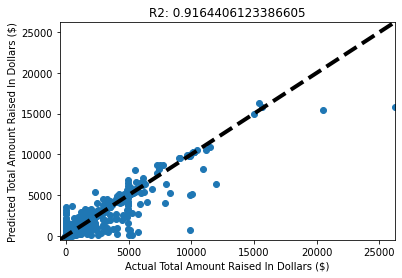

In [15]:
# %matplotlib inline
print(r_squared)
# fig, ax = plt.subplots()
# ax.scatter(y_test,y_pred)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual Total Amount Raised In Dollars ($)')
# ax.set_ylabel('Predicted Total Amount Raised In Dollars ($)')
# ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2: ' + str(r2_score(y_test, y_pred)))
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../Resources/Predicted_Total_Amount_Regression_2005.png')

In [16]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
# pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [18]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [19]:
# pred_graph = pred_graph.reset_index()
pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
680,2207,15,1886,102,0.00,0,6125,0.0000
876,5971,56,7456,312,0.00,0,1290470,0.0000
1353,11055,88,7766,968,0.00,0,40045,0.0000
529,754,5,987,34,0.00,0,1875,0.0000
1541,762,4,899,5,0.00,0,1913,0.0000
...,...,...,...,...,...,...,...,...
339,27669,269,46064,1870,41354.50,4688,15201,53816.2582
348,47331,415,69864,2822,38988.50,9930,0,64748.1237
560,45910,431,18607,3026,51517.67,7539,134221,67847.7239
